In [1]:
import sys
sys.path.append("../../")

In [31]:
import os
import time
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.manifold import TSNE
from iml_group_proj.data.preprocess import AverageEmbeddingsPerRecord, DataMode
from iml_group_proj.data.utils import load_libofc_df
from iml_group_proj.data.embeddings import EmbeddingsDataLoader, EmbeddingsType

In [32]:
DATA_PATH = "../../github_data"

_, train, test = load_libofc_df(os.path.join(DATA_PATH, "trainTest.pk"))
w2v_data = EmbeddingsDataLoader.load(DATA_PATH, "w2v")
bert_data = EmbeddingsDataLoader.load(DATA_PATH, "bert_small")

In [36]:
class_to_name_map = {
        "A":	"General Works",
        "B":	"Philosophy. Psychology. Religion",
        "C":	"Auxiliary Sciences of History",
        "D":	"World History and History of Europe, Asia, Africa, Australia, New Zealand, etc.",
        "E":	"History of the Americas (E)",
        "F":	"History of the Americas (F)",
        "G":	"Geography. Anthropology. Recreation",
        "H":	"Social Sciences",
        "J":	"Political Science",
        "K":	"Law",
        "L":	"Education",
        "M":	"Music and Books on Music",
        "N":	"Fine Arts",
        "P":	"Language and Literature",
        "Q":	"Science",
        "R":	"Medicine",
        "S":	"Agriculture",
        "T":	"Technology",
        "U":	"Military Science",
        "V":	"Naval Science",
        "Z":	"Bibliography. Library Science. Information Resources (General)",
        }


train["class_name"] = train["class"].apply(lambda x: class_to_name_map.get(x, "Unknown"))
y_train = train["class_name"]

In [13]:
def prep(data):    
    EMP = np.zeros(300)
    X_train_title = np.stack([e.mean(axis=0) if len(e) > 0 else EMP for e in data.train_title])
    X_train_synopsis = np.stack([e.mean(axis=0) if len(e) > 0 else EMP for e in data.train_synopsis])
    
    return X_train_title, X_train_synopsis

_, bert_synopsis = prep(bert_data)
_, w2v_synopsis = prep(w2v_data)

In [14]:
bert_synopsis_embedded = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(bert_synopsis)
w2v_synopsis_embedded = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(w2v_synopsis)

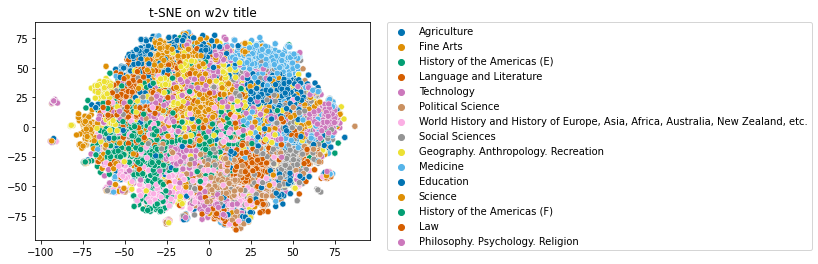

In [37]:
def plot_scatter(data, name):
    sns.scatterplot(
        x=data[:,0], 
        y=data[:,1], 
        hue=y_train, 
        palette="colorblind"
    ).set_title(name)
    # Put the legend out of the figure
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    

plot_scatter(w2v_synopsis_embedded, "t-SNE on w2v title")

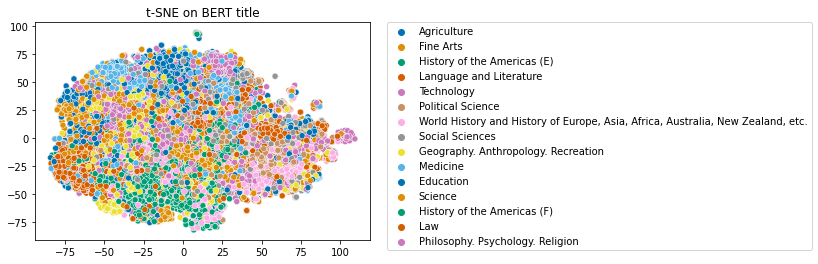

In [38]:
plot_scatter(bert_synopsis_embedded, "t-SNE on BERT title")